# **Loading the Dataset**

In [1]:
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Here, I am loading the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Preprocessing the Data**

Here is an interpretation of what I did here:
1. Reshape Images: Convert the 2D images (28x28 pixels) into a 4D tensor format (number_of_images, height, width, channels) to make them suitable for the CNN. Since the images are grayscale, the number of channels is 1.
2. Normalize Pixel Values: Scale the pixel values from the range [0, 255] to [0, 1] by dividing by 255. This helps the model learn faster and improves accuracy.

In [2]:
# Here, I am preprocessing the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

# **Building the CNN Model**

Below is an explanation of the layers and the output

1.   Conv2D (32 filters): Detects basic patterns like edges using 32 filters.
2.   MaxPooling2D (2x2): Reduces the size of the feature map to focus on key information.
3. Conv2D (64 filters): Captures more complex patterns with 64 filters.
4. MaxPooling2D (2x2): Further reduces the feature map size for efficiency.
5. Flatten: Converts the 2D feature map into a 1D vector for classification.
6. Dense (128 units): Fully connected layer for learning abstract representations.
7. Output Layer: Dense with 10 neurons for classification (not part of the 6 main layers)

In [10]:
# Here, I am building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# **Compiling the Model**

Compiling the model comprises of:
1. Optimizer: Defines how the model updates its weights during training (e.g., Adam for efficient gradient updates).
2. Loss Function: Measures the error between predicted and actual values (e.g., sparse_categorical_crossentropy for multi-class classification).
3. Metrics: Defines performance metrics to track (e.g., accuracy to monitor how well the model is classifying).

In [11]:
# Here, I am compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **Make and Show Predictions**

1. First Image (Top)

* Predicted: 9: The model predicted the image as class 9, which represents a "Ankle Boot" in the Fashion MNIST dataset.
* True: 9: The true label for this image is class 9, which represents "Ankle Boot."
* Observation: The prediction was correct

2. Second Image (Bottom)

* Predicted: 0: The model predicted the image as class 0, which represents "T-shirt/top"
* True: 2: The true label for this image is class 2, which represents a "Pullover."
* Observation: The model made an incorrect prediction here, confusing a pullover with a t-shirt.

3. Key Insights:
The CNN was not fully accurate on the second image.

This could be due to various factors like insufficient training data, suboptimal architecture, or issues with hyperparameter tuning.

4. How to improve the model
* Data Augmentation: Apply random rotations, flips, and zooms to increase dataset variety.
* Increase Filters: Use more filters in the Conv2D layers (e.g., 64 → 128) to capture more detailed patterns.
* Add More Layers: Include extra convolutional and pooling layers to deepen the network and learn more complex features.
* Batch Normalization: Normalize layer activations to speed up training and improve stability.
* Dropout: Add dropout layers to reduce overfitting by randomly turning off neurons during training.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


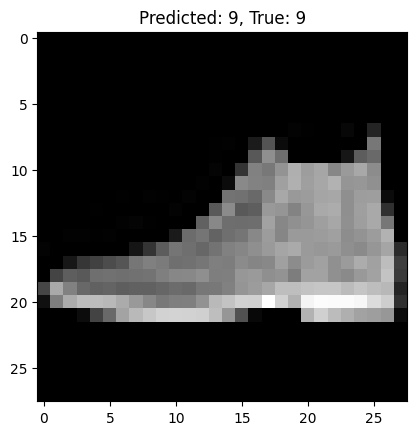

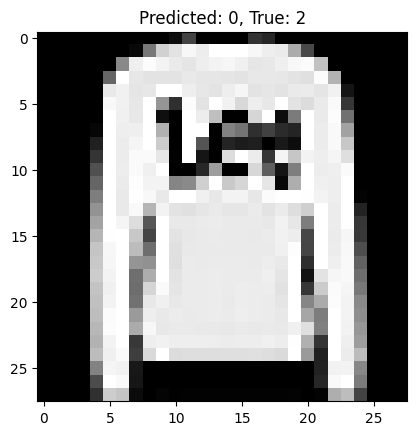

In [12]:
# Make predictions
predictions = model.predict(test_images[:2])

# Show the predictions
for i in range(2):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}')
    plt.show()